<a href="https://colab.research.google.com/github/aweeeaja/Pemrosesan-Teks/blob/main/sentimen_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pemrosesan teks/timnas.csv')

df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1786312118196899843,Fri May 03 08:29:31 +0000 2024,0,Yang hujat timnas emang orang kagak ngerti bol...,1786312118196899843,NaN,NaN,in,NaN,0,0,0,https://twitter.com/k_mawala/status/1786312118...,1206196828028293122,k_mawala
1,1786312103118434489,Fri May 03 08:29:28 +0000 2024,0,heran banget cape bayar exc biar ngerti keseha...,1786312103118434489,NaN,NaN,in,NaN,0,0,0,https://twitter.com/juleyhadid/status/17863121...,1733382194847240192,juleyhadid
2,1786253674957922810,Fri May 03 08:29:23 +0000 2024,0,@utdabout Gw ngebacot tentang dia malah gw di ...,1786312085519175762,NaN,utdabout,in,NaN,0,0,0,https://twitter.com/Hafes760061511/status/1786...,1480717501667237891,Hafes760061511
3,1786311429395771474,Fri May 03 08:29:17 +0000 2024,0,jd gaperlu terlalu dibacain komen2nya. dengeri...,1786312060202336694,NaN,niko_junius,in,Indonesia,0,0,0,https://twitter.com/niko_junius/status/1786312...,157388803,niko_junius
4,1786310532578103681,Fri May 03 08:29:13 +0000 2024,0,tapi ga bisa dijadikan alesan juga sih buat ng...,1786312041961251004,NaN,heyaachi,in,NaN,0,0,0,https://twitter.com/heyaachi/status/1786312041...,1210717971141652480,heyaachi


In [ ]:
df = df[['full_text']]
df

,full_text
0,Yang hujat timnas emang orang kagak ngerti bol...
1,heran banget cape bayar exc biar ngerti keseha...
2,@utdabout Gw ngebacot tentang dia malah gw di ...
3,jd gaperlu terlalu dibacain komen2nya. dengeri...
4,tapi ga bisa dijadikan alesan juga sih buat ng...
...,...
999,@GilangAlghfr @FaktaSepakbola Siap bro gue uda...
1000,@idextratime Anjir lah. Udah bener harusnya re...
1001,@utdfocusid @bliblidotcom Emg paling bener gau...
1002,@utdfocusid @bliblidotcom wkwkw itu kan mainny...


# PRE PROCESSING

In [ ]:
df.shape

(1004, 1)

In [ ]:
df = df.drop_duplicates(subset=['full_text'])

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(1003, 1)

In [ ]:
df.isnull().sum()

full_text    0
dtype: int64

In [ ]:
def clean (text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)
  text = re.sub(r'[^A-Za-z0-9 ]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text

df['clean'] = df['full_text'].apply(clean)

<ipython-input-9-8a04d8c9675c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean'] = df['full_text'].apply(clean)


In [ ]:
df['lower'] = df['clean'].str.lower()

<ipython-input-10-4d46eeb11f9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lower'] = df['clean'].str.lower()


In [ ]:
df.head(50)

,full_text,clean,lower
0,Yang hujat timnas emang orang kagak ngerti bol...,Yang hujat timnas emang orang kagak ngerti bol...,yang hujat timnas emang orang kagak ngerti bol...
1,heran banget cape bayar exc biar ngerti keseha...,heran banget cape bayar exc biar ngerti keseha...,heran banget cape bayar exc biar ngerti keseha...
2,@utdabout Gw ngebacot tentang dia malah gw di ...,Gw ngebacot tentang dia malah gw di kick sama ...,gw ngebacot tentang dia malah gw di kick sama ...
3,jd gaperlu terlalu dibacain komen2nya. dengeri...,jd gaperlu terlalu dibacain komen2nya dengerin...,jd gaperlu terlalu dibacain komen2nya dengerin...
4,tapi ga bisa dijadikan alesan juga sih buat ng...,tapi ga bisa dijadikan alesan juga sih buat ng...,tapi ga bisa dijadikan alesan juga sih buat ng...
5,Guinea Punya 13 Pemain yang Main di Eropa Sang...,Guinea Punya 13 Pemain yang Main di Eropa Sang...,guinea punya 13 pemain yang main di eropa sang...
6,Ngeliat banyaknya orang yang marah-marah atas ...,Ngeliat banyaknya orang yang marahmarah atas k...,ngeliat banyaknya orang yang marahmarah atas k...
7,@baslightyearrr @pian_cfp @utdabout Ga ngaruh ...,Ga ngaruh di timnas senior ada haye ivar ragnar,ga ngaruh di timnas senior ada haye ivar ragnar
8,@idextratime Wkwk yo cen bener. Menowo neng ti...,Wkwk yo cen bener Menowo neng timnas ono natha...,wkwk yo cen bener menowo neng timnas ono natha...
9,Jersey Timnas Indonesia 2023 Grade Ori Home Th...,Jersey Timnas Indonesia 2023 Grade Ori Home Th...,jersey timnas indonesia 2023 grade ori home th...


In [ ]:
#tokenize
def tokenize(text):
  tokens = text.split()
  return tokens

df['tokenize'] = df['lower'].apply(tokenize)

df.head(50)

<ipython-input-12-262ba8373cf9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenize'] = df['lower'].apply(tokenize)


,full_text,clean,lower,tokenize
0,Yang hujat timnas emang orang kagak ngerti bol...,Yang hujat timnas emang orang kagak ngerti bol...,yang hujat timnas emang orang kagak ngerti bol...,"[yang, hujat, timnas, emang, orang, kagak, nge..."
1,heran banget cape bayar exc biar ngerti keseha...,heran banget cape bayar exc biar ngerti keseha...,heran banget cape bayar exc biar ngerti keseha...,"[heran, banget, cape, bayar, exc, biar, ngerti..."
2,@utdabout Gw ngebacot tentang dia malah gw di ...,Gw ngebacot tentang dia malah gw di kick sama ...,gw ngebacot tentang dia malah gw di kick sama ...,"[gw, ngebacot, tentang, dia, malah, gw, di, ki..."
3,jd gaperlu terlalu dibacain komen2nya. dengeri...,jd gaperlu terlalu dibacain komen2nya dengerin...,jd gaperlu terlalu dibacain komen2nya dengerin...,"[jd, gaperlu, terlalu, dibacain, komen2nya, de..."
4,tapi ga bisa dijadikan alesan juga sih buat ng...,tapi ga bisa dijadikan alesan juga sih buat ng...,tapi ga bisa dijadikan alesan juga sih buat ng...,"[tapi, ga, bisa, dijadikan, alesan, juga, sih,..."
5,Guinea Punya 13 Pemain yang Main di Eropa Sang...,Guinea Punya 13 Pemain yang Main di Eropa Sang...,guinea punya 13 pemain yang main di eropa sang...,"[guinea, punya, 13, pemain, yang, main, di, er..."
6,Ngeliat banyaknya orang yang marah-marah atas ...,Ngeliat banyaknya orang yang marahmarah atas k...,ngeliat banyaknya orang yang marahmarah atas k...,"[ngeliat, banyaknya, orang, yang, marahmarah, ..."
7,@baslightyearrr @pian_cfp @utdabout Ga ngaruh ...,Ga ngaruh di timnas senior ada haye ivar ragnar,ga ngaruh di timnas senior ada haye ivar ragnar,"[ga, ngaruh, di, timnas, senior, ada, haye, iv..."
8,@idextratime Wkwk yo cen bener. Menowo neng ti...,Wkwk yo cen bener Menowo neng timnas ono natha...,wkwk yo cen bener menowo neng timnas ono natha...,"[wkwk, yo, cen, bener, menowo, neng, timnas, o..."
9,Jersey Timnas Indonesia 2023 Grade Ori Home Th...,Jersey Timnas Indonesia 2023 Grade Ori Home Th...,jersey timnas indonesia 2023 grade ori home th...,"[jersey, timnas, indonesia, 2023, grade, ori, ..."


In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))

df.head(50)

<ipython-input-15-e2fe8281525e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stopword_removal'] = df['tokenize'].apply(lambda x: remove_stopwords(x))


,full_text,clean,lower,tokenize,stopword_removal
0,Yang hujat timnas emang orang kagak ngerti bol...,Yang hujat timnas emang orang kagak ngerti bol...,yang hujat timnas emang orang kagak ngerti bol...,"[yang, hujat, timnas, emang, orang, kagak, nge...","[hujat, timnas, emang, orang, kagak, ngerti, b..."
1,heran banget cape bayar exc biar ngerti keseha...,heran banget cape bayar exc biar ngerti keseha...,heran banget cape bayar exc biar ngerti keseha...,"[heran, banget, cape, bayar, exc, biar, ngerti...","[heran, banget, cape, bayar, exc, biar, ngerti..."
2,@utdabout Gw ngebacot tentang dia malah gw di ...,Gw ngebacot tentang dia malah gw di kick sama ...,gw ngebacot tentang dia malah gw di kick sama ...,"[gw, ngebacot, tentang, dia, malah, gw, di, ki...","[gw, ngebacot, gw, kick, fans, fomo, nya, grup..."
3,jd gaperlu terlalu dibacain komen2nya. dengeri...,jd gaperlu terlalu dibacain komen2nya dengerin...,jd gaperlu terlalu dibacain komen2nya dengerin...,"[jd, gaperlu, terlalu, dibacain, komen2nya, de...","[jd, gaperlu, dibacain, komen2nya, dengerin, a..."
4,tapi ga bisa dijadikan alesan juga sih buat ng...,tapi ga bisa dijadikan alesan juga sih buat ng...,tapi ga bisa dijadikan alesan juga sih buat ng...,"[tapi, ga, bisa, dijadikan, alesan, juga, sih,...","[ga, dijadikan, alesan, sih, ngehate, kasih, k..."
5,Guinea Punya 13 Pemain yang Main di Eropa Sang...,Guinea Punya 13 Pemain yang Main di Eropa Sang...,guinea punya 13 pemain yang main di eropa sang...,"[guinea, punya, 13, pemain, yang, main, di, er...","[guinea, 13, pemain, main, eropa, sanggupkah, ..."
6,Ngeliat banyaknya orang yang marah-marah atas ...,Ngeliat banyaknya orang yang marahmarah atas k...,ngeliat banyaknya orang yang marahmarah atas k...,"[ngeliat, banyaknya, orang, yang, marahmarah, ...","[ngeliat, banyaknya, orang, marahmarah, kekala..."
7,@baslightyearrr @pian_cfp @utdabout Ga ngaruh ...,Ga ngaruh di timnas senior ada haye ivar ragnar,ga ngaruh di timnas senior ada haye ivar ragnar,"[ga, ngaruh, di, timnas, senior, ada, haye, iv...","[ga, ngaruh, timnas, senior, haye, ivar, ragnar]"
8,@idextratime Wkwk yo cen bener. Menowo neng ti...,Wkwk yo cen bener Menowo neng timnas ono natha...,wkwk yo cen bener menowo neng timnas ono natha...,"[wkwk, yo, cen, bener, menowo, neng, timnas, o...","[wkwk, yo, cen, bener, menowo, neng, timnas, o..."
9,Jersey Timnas Indonesia 2023 Grade Ori Home Th...,Jersey Timnas Indonesia 2023 Grade Ori Home Th...,jersey timnas indonesia 2023 grade ori home th...,"[jersey, timnas, indonesia, 2023, grade, ori, ...","[jersey, timnas, indonesia, 2023, grade, ori, ..."


In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.5 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
  return [stemmer.stem(word) for word in text]

df['stemming_data'] = df['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))

df.head(50)

<ipython-input-17-af00eb9c4407>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemming_data'] = df['stopword_removal'].apply(lambda x: ' '.join(stem_text(x)))


,full_text,clean,lower,tokenize,stopword_removal,stemming_data
0,Yang hujat timnas emang orang kagak ngerti bol...,Yang hujat timnas emang orang kagak ngerti bol...,yang hujat timnas emang orang kagak ngerti bol...,"[yang, hujat, timnas, emang, orang, kagak, nge...","[hujat, timnas, emang, orang, kagak, ngerti, b...",hujat timnas emang orang kagak ngerti bola tar...
1,heran banget cape bayar exc biar ngerti keseha...,heran banget cape bayar exc biar ngerti keseha...,heran banget cape bayar exc biar ngerti keseha...,"[heran, banget, cape, bayar, exc, biar, ngerti...","[heran, banget, cape, bayar, exc, biar, ngerti...",heran banget cape bayar exc biar ngerti hari b...
2,@utdabout Gw ngebacot tentang dia malah gw di ...,Gw ngebacot tentang dia malah gw di kick sama ...,gw ngebacot tentang dia malah gw di kick sama ...,"[gw, ngebacot, tentang, dia, malah, gw, di, ki...","[gw, ngebacot, gw, kick, fans, fomo, nya, grup...",gw ngebacot gw kick fans fomo nya grup wa timn...
3,jd gaperlu terlalu dibacain komen2nya. dengeri...,jd gaperlu terlalu dibacain komen2nya dengerin...,jd gaperlu terlalu dibacain komen2nya dengerin...,"[jd, gaperlu, terlalu, dibacain, komen2nya, de...","[jd, gaperlu, dibacain, komen2nya, dengerin, a...",jd gaperlu dibacain komen2nya dengerin aja kat...
4,tapi ga bisa dijadikan alesan juga sih buat ng...,tapi ga bisa dijadikan alesan juga sih buat ng...,tapi ga bisa dijadikan alesan juga sih buat ng...,"[tapi, ga, bisa, dijadikan, alesan, juga, sih,...","[ga, dijadikan, alesan, sih, ngehate, kasih, k...",ga jadi alesan sih ngehate kasih kritik doain ...
5,Guinea Punya 13 Pemain yang Main di Eropa Sang...,Guinea Punya 13 Pemain yang Main di Eropa Sang...,guinea punya 13 pemain yang main di eropa sang...,"[guinea, punya, 13, pemain, yang, main, di, er...","[guinea, 13, pemain, main, eropa, sanggupkah, ...",guinea 13 main main eropa sanggup timnas u23 m...
6,Ngeliat banyaknya orang yang marah-marah atas ...,Ngeliat banyaknya orang yang marahmarah atas k...,ngeliat banyaknya orang yang marahmarah atas k...,"[ngeliat, banyaknya, orang, yang, marahmarah, ...","[ngeliat, banyaknya, orang, marahmarah, kekala...",ngeliat banyak orang marahmarah kalah timnas k...
7,@baslightyearrr @pian_cfp @utdabout Ga ngaruh ...,Ga ngaruh di timnas senior ada haye ivar ragnar,ga ngaruh di timnas senior ada haye ivar ragnar,"[ga, ngaruh, di, timnas, senior, ada, haye, iv...","[ga, ngaruh, timnas, senior, haye, ivar, ragnar]",ga ngaruh timnas senior haye ivar ragnar
8,@idextratime Wkwk yo cen bener. Menowo neng ti...,Wkwk yo cen bener Menowo neng timnas ono natha...,wkwk yo cen bener menowo neng timnas ono natha...,"[wkwk, yo, cen, bener, menowo, neng, timnas, o...","[wkwk, yo, cen, bener, menowo, neng, timnas, o...",wkwk yo cen bener menowo neng timnas ono natha...
9,Jersey Timnas Indonesia 2023 Grade Ori Home Th...,Jersey Timnas Indonesia 2023 Grade Ori Home Th...,jersey timnas indonesia 2023 grade ori home th...,"[jersey, timnas, indonesia, 2023, grade, ori, ...","[jersey, timnas, indonesia, 2023, grade, ori, ...",jersey timnas indonesia 2023 grade ori home th...


In [ ]:
data = df['stemming_data']
data.head(5)

0    hujat timnas emang orang kagak ngerti bola tar...
1    heran banget cape bayar exc biar ngerti hari b...
2    gw ngebacot gw kick fans fomo nya grup wa timn...
3    jd gaperlu dibacain komen2nya dengerin aja kat...
4    ga jadi alesan sih ngehate kasih kritik doain ...
Name: stemming_data, dtype: object

In [ ]:
!pip install translate

In [ ]:
!pip install google-cloud-translate

In [ ]:
from google.cloud import translate_v2 as translate

def translate_text(tweet, target_language='en'):
    translate_client = translate.Client()

    # Lakukan permintaan untuk menerjemahkan teks
    result = translate_client.translate(tweet, target_language=target_language)

    return result['translatedText']

# Contoh penggunaan
data = data.apply(translate_text)


RefreshError: ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Engine metadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x799f38587610>)

In [ ]:
from translate import Translator

def convert_eng(tweet):
  translator = Translator(to_lang ="en", from_lang="id")
  translation = translator.translate(tweet)
  return translation

data['tweet_eng'] = data.apply(convert_eng)
data.head(50)

<ipython-input-20-ee3109e1dea1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_eng'] = data.apply(convert_eng)


0     hujat timnas emang orang kagak ngerti bola tar...
1     heran banget cape bayar exc biar ngerti hari b...
2     gw ngebacot gw kick fans fomo nya grup wa timn...
3     jd gaperlu dibacain komen2nya dengerin aja kat...
4     ga jadi alesan sih ngehate kasih kritik doain ...
5     guinea 13 main main eropa sanggup timnas u23 m...
6     ngeliat banyak orang marahmarah kalah timnas k...
7              ga ngaruh timnas senior haye ivar ragnar
8     wkwk yo cen bener menowo neng timnas ono natha...
9     jersey timnas indonesia 2023 grade ori home th...
10         plis kasih tau obat galau gue galauin timnas
11    mending ga yg bela bang wis fokus match moga t...
12                 coret aja dr squad timnas biar mikir
13                                   pantas main timnas
14    mentas emang nggak expect timnas u23 biasa yg ...
15    akun ig nya belakang pake nomor 10 bang pake n...
16    maen jelek timnas kalo main main lokal abis li...
17    mampus fans bola fanwar main timnas amp fa

In [ ]:
data['tweet_eng'].head(1000)

0       blasphemy against the national team, people do...
1       wonder cape pay exc so understand bacot day ch...
2       gw ngebacot gw kick fans fomo nya grup wa timn...
3       jd gaperlu read the comments just listen to th...
4       ga so alesan sih ngehate love criticism doain ...
                              ...                        
996     MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
997     MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
998     MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
999     MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
1000    MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
Name: stemming_data, Length: 1000, dtype: object

In [ ]:
data.info()

<class 'pandas.core.series.Series'>
Index: 1004 entries, 0 to tweet_eng
Series name: stemming_data
Non-Null Count  Dtype 
--------------  ----- 
1004 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [ ]:
!pip install tweet-preprocessor
!pip install textblob

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_tweet = list(data['tweet_eng'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
    total_positif += 1
    status.append('Positif')

  elif analysis.sentiment.polarity == 0.0:
    total_netral += 1
    status.append('Netral')

  else:
    total_negatif += 1
    status.append('Negatif')

  total += 1

print(f'Hasil Analisis Data:\nPositif= {total_positif}\nNetral= {total_netral}\nNegatif= {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif= 907
Netral= 61
Negatif= 35

Total Data : 1003


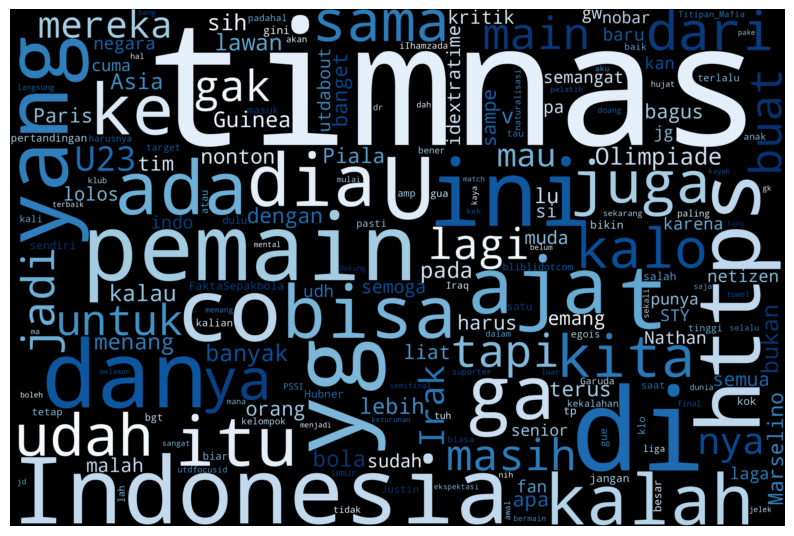

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([tweets for tweets in df['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords = STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif','Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]